## <font color=green> 1. Setup <a name="setup"></a></font> ##

### Import libraries and load the dataset

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import asarray

dementia_data = pd.read_csv("data/dementia_data_cleaned_v2.csv", delimiter=",")

## <font color=green> 5. Making the model </font> ##

In [62]:
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

from xgboost import XGBClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

### 5.1 Selecting target features ###

In [63]:
NUMBER_OF_FEATURES = 13
corr = dementia_data.drop('dementia_all', axis=1).corrwith(dementia_data.dementia_all).abs().sort_values(ascending=False)
n_features = corr.head(NUMBER_OF_FEATURES)
model_features = n_features.index.to_numpy()

X = dementia_data[model_features]
y = dementia_data['dementia_all'].values
X

,SVD Amended Score,SVD Simple Score,lac_count,age,Global,EF,lacunes_num,PS,Fazekas,fazekas_cat,CMB_count,diabetes,hypertension
0,7.0,3.0,5,52.67,-1.287000,-2.403333,1,-1.290000,3,1,1,0,1
1,3.0,2.0,1,64.58,0.744000,1.280000,1,0.360000,1,0,1,0,1
2,2.0,1.0,1,74.92,-0.922000,-1.440000,1,-1.520000,1,0,0,0,1
3,4.0,2.0,3,74.83,-1.301102,-0.063088,1,-2.136271,2,1,0,0,1
4,3.0,2.0,1,79.25,-0.924000,-0.920000,1,-1.493333,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,0.0,0.0,0,67.00,-0.260000,-0.100000,0,-0.020000,0,0,0,0,1
1838,0.0,0.0,0,71.00,-1.003333,-0.370000,0,-1.060000,1,0,0,0,1
1839,0.0,0.0,0,55.00,0.610000,0.460000,0,0.960000,0,0,0,0,0
1840,0.0,0.0,0,54.00,0.590000,0.190000,0,0.030000,1,0,0,0,0


### 5.2. Splitting the dataset ###

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train

,SVD Amended Score,SVD Simple Score,lac_count,age,Global,EF,lacunes_num,PS,Fazekas,fazekas_cat,CMB_count,diabetes,hypertension
857,0.0,0.0,0,59.000000,-0.886667,-1.010000,0,-0.830000,1,0,0,0,1
1169,1.0,1.0,0,66.000000,-0.180000,0.170000,0,-1.110000,2,1,0,0,1
1155,0.0,0.0,0,86.000000,-0.026860,-1.160000,0,-0.066649,1,0,0,0,1
818,0.0,0.0,3,79.000000,-0.486667,-0.340000,1,-0.990000,3,1,0,0,1
976,2.0,1.0,0,66.000000,-0.840000,-0.610000,0,-0.770000,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,0.0,0.0,0,55.000000,0.073333,0.180000,0,0.340000,1,0,0,0,1
272,3.0,2.0,1,79.893224,-1.453624,-1.413292,1,-1.973444,2,1,0,0,1
1311,2.0,1.0,0,68.000000,-0.280000,-0.840000,0,-0.350000,3,1,0,1,0
1247,0.0,0.0,0,77.000000,-0.836667,-0.620000,0,-1.270000,1,0,0,0,1


### 5.3. Defining models


In [65]:
dtc = DecisionTreeClassifier(criterion="gini", max_depth=2)
rfc = RandomForestClassifier(n_estimators = 20, max_depth = 2)
bac = BaggingClassifier(KNeighborsClassifier(), n_estimators = 75)
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), n_estimators = 2, learning_rate=0.1)
bst = XGBClassifier(n_estimators=18, max_depth=2, learning_rate=0.1, subsample=0.6, objective='binary:logistic')

model_names = ['Decision Tree', 'Random Forest', 'K Nearest Neighbour', 'Adaptive Boosting', 'Extreme Gradient Boosting']
models = [dtc, rfc, bac, ada, bst]

estimators = list(zip(model_names,models))
vcl = VotingClassifier(estimators=estimators, voting='hard')

model_names.append('Voting Classifier')

models.append(vcl)

Define metrics in order to later evaluate and tune models to these 

In [66]:
from tabulate import tabulate

def calc_metrics(predictions, cf, y_test=y_test):
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    specificity = cf[3]/(cf[3]+cf[1])
    f1 = f1_score(y_test, predictions)
    fpr, tpr, _ = roc_curve(y_test, predictions) 
    roc_auc = auc(fpr, tpr)

    metrics = [
        ["Accuracy", accuracy],
        ["Recall", recall],
        ["Precision", precision],
        ["Specificity", specificity],
        ["F1 Score", f1],
        ["ROC-AUC", roc_auc]
    ]
    headers = ["Metric", "Value"]
    print(tabulate(metrics, headers=headers, tablefmt="grid"))
    return [accuracy, recall, precision, specificity, f1, roc_auc]

Define visualization for confusion matrix, useful to see the model predictons/classifications in relationship to each other. 

In [67]:
# rotate a 2 x 2 matrix 180 degrees
def rotate_confusion_matrix(cf_matrix):
    return cf_matrix[::-1,::-1].T

def visualize_cf(predictions, title, accuracy, y_test=y_test): 
    cf_matrix = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cf_matrix.ravel()
    order = [tp, fp, fn, tn] 
    group_names = ['True Positive', 'False Positive', 'False Negative', 'True Negative']
    group_counts = ["{0:0.0f}".format(value) for value in order]
    group_percentages = ["{0:.2%}".format(value) for value in order/np.sum(order)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    flipped_cf_matrix = rotate_confusion_matrix(cf_matrix)
    ax = sns.heatmap(flipped_cf_matrix, annot=labels, fmt="", cmap='Blues',
                     xticklabels=['True', 'False'], yticklabels=['True', 'False'])
    ax.axis('on')
    ax.xaxis.set_label_position('top')
    
    plt.xlabel("actual")
    plt.ylabel("predicted")
    plt.title(f"{title}: {round(accuracy*100, 2)} %")
    plt.show()
    return order

Train the models defined above and visualize their test predictions - To gain insight as to which model seems best for our purposes and further choice or adjust parameters of selected models. 

1) Model Name: Decision Tree


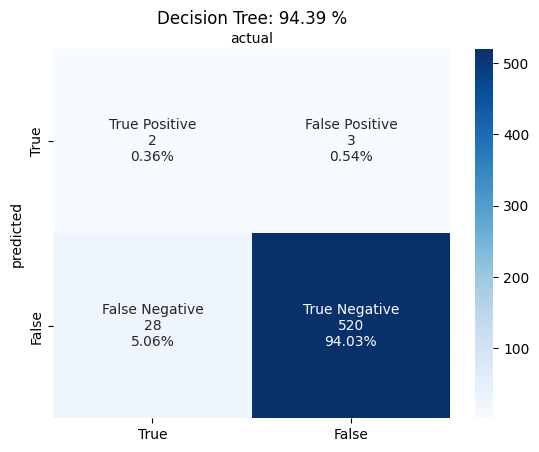

+-------------+-----------+
| Metric      |     Value |
+=============+===========+
| Accuracy    | 0.943942  |
+-------------+-----------+
| Recall      | 0.0666667 |
+-------------+-----------+
| Precision   | 0.4       |
+-------------+-----------+
| Specificity | 0.994264  |
+-------------+-----------+
| F1 Score    | 0.114286  |
+-------------+-----------+
| ROC-AUC     | 0.530465  |
+-------------+-----------+
2) Model Name: Random Forest


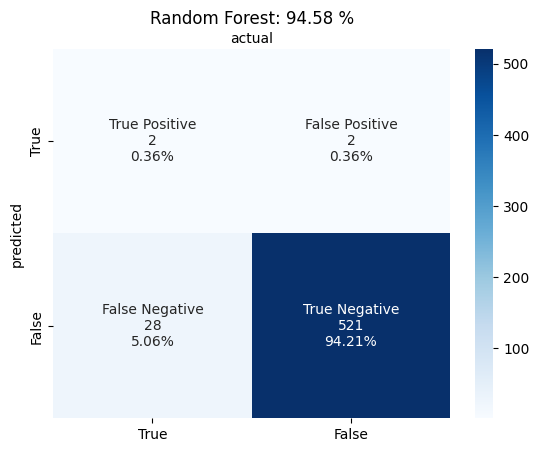

+-------------+-----------+
| Metric      |     Value |
+=============+===========+
| Accuracy    | 0.94575   |
+-------------+-----------+
| Recall      | 0.0666667 |
+-------------+-----------+
| Precision   | 0.5       |
+-------------+-----------+
| Specificity | 0.996176  |
+-------------+-----------+
| F1 Score    | 0.117647  |
+-------------+-----------+
| ROC-AUC     | 0.531421  |
+-------------+-----------+
3) Model Name: K Nearest Neighbour


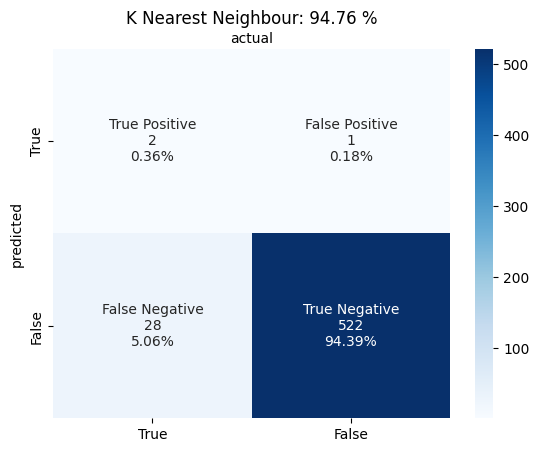

+-------------+-----------+
| Metric      |     Value |
+=============+===========+
| Accuracy    | 0.947559  |
+-------------+-----------+
| Recall      | 0.0666667 |
+-------------+-----------+
| Precision   | 0.666667  |
+-------------+-----------+
| Specificity | 0.998088  |
+-------------+-----------+
| F1 Score    | 0.121212  |
+-------------+-----------+
| ROC-AUC     | 0.532377  |
+-------------+-----------+
4) Model Name: Adaptive Boosting


c:\Users\Study\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


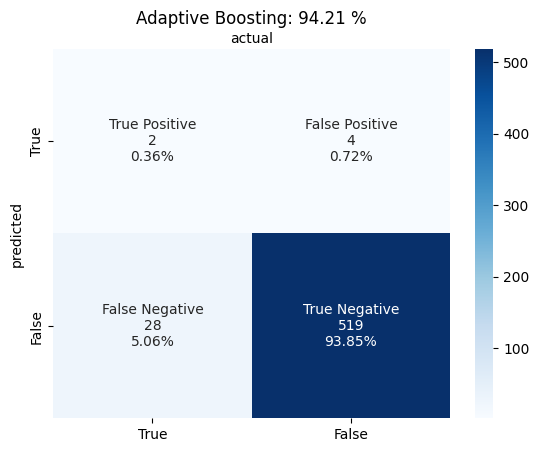

+-------------+-----------+
| Metric      |     Value |
+=============+===========+
| Accuracy    | 0.942134  |
+-------------+-----------+
| Recall      | 0.0666667 |
+-------------+-----------+
| Precision   | 0.333333  |
+-------------+-----------+
| Specificity | 0.992352  |
+-------------+-----------+
| F1 Score    | 0.111111  |
+-------------+-----------+
| ROC-AUC     | 0.529509  |
+-------------+-----------+
5) Model Name: Extreme Gradient Boosting


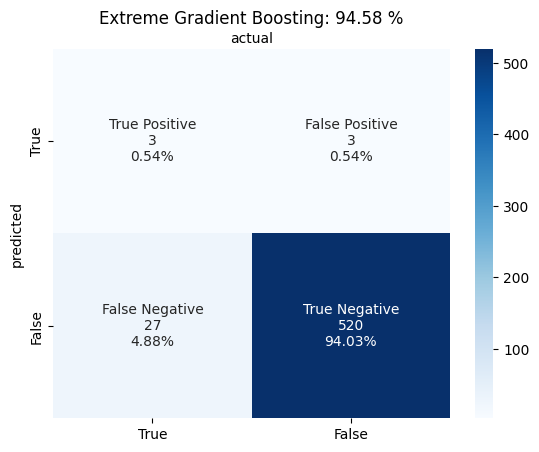

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.94575  |
+-------------+----------+
| Recall      | 0.1      |
+-------------+----------+
| Precision   | 0.5      |
+-------------+----------+
| Specificity | 0.994264 |
+-------------+----------+
| F1 Score    | 0.166667 |
+-------------+----------+
| ROC-AUC     | 0.547132 |
+-------------+----------+
6) Model Name: Voting Classifier


c:\Users\Study\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


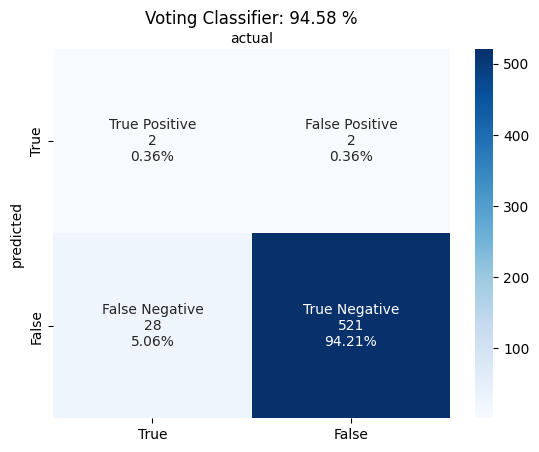

+-------------+-----------+
| Metric      |     Value |
+=============+===========+
| Accuracy    | 0.94575   |
+-------------+-----------+
| Recall      | 0.0666667 |
+-------------+-----------+
| Precision   | 0.5       |
+-------------+-----------+
| Specificity | 0.996176  |
+-------------+-----------+
| F1 Score    | 0.117647  |
+-------------+-----------+
| ROC-AUC     | 0.531421  |
+-------------+-----------+


In [68]:
def train_and_test_models(models, model_names, X_training=X_train, y_training=y_train):
    model_metrics = []
    for i, model in enumerate(models):
        print(f"{i+1}) Model Name: {model_names[i]}")
        model.fit(X_training, y_training)
        model_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, model_pred)
        order = visualize_cf(model_pred, model_names[i],accuracy)
        metric = calc_metrics(model_pred, order)
        model_metrics.append(metric)
    return model_metrics

actual_metrics = train_and_test_models(models, model_names)

### 5.4. Oversampling 

As only 6.3% of the overall dataset consists of patients diagnosed with dementia, we will now make a SMOTEomic oversampling on the target feature. Oversampling using SMOTE and Tomelink. 

We do this in order to create a more robust and reliable model, as the imbalance when having a small amount of entries with the target feature(83 in the minority class), can cause high variance in the model trained. 

However to much oversampling can have another negative effect of creating bias.    


SMOTE - synthetic minority over-sampling technique, tries to generate artifical samples by interpolating existing samples from the minority class

In [69]:
print(Counter(y_train))
smo = SMOTE(sampling_strategy=0.7)
X_S, y_S = smo.fit_resample(X_train, y_train)
print(Counter(y_S))

Counter({0: 1203, 1: 86})
Counter({0: 1203, 1: 842})


1) Model Name: Decision Tree


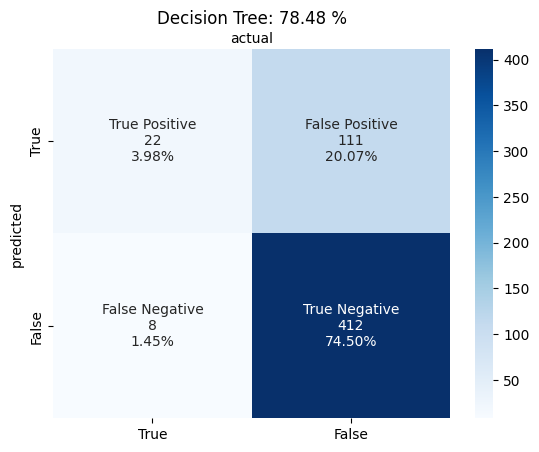

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.78481  |
+-------------+----------+
| Recall      | 0.733333 |
+-------------+----------+
| Precision   | 0.165414 |
+-------------+----------+
| Specificity | 0.787763 |
+-------------+----------+
| F1 Score    | 0.269939 |
+-------------+----------+
| ROC-AUC     | 0.760548 |
+-------------+----------+
2) Model Name: Random Forest


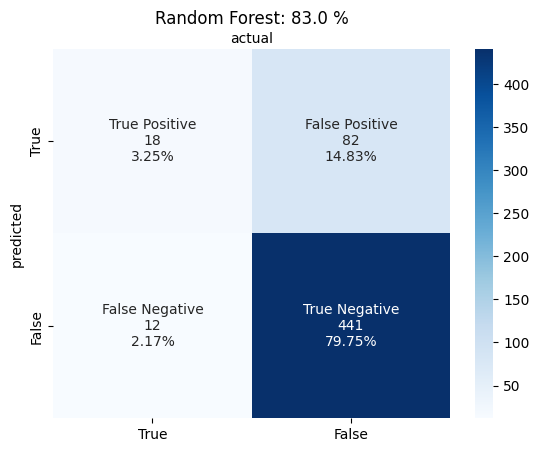

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.830018 |
+-------------+----------+
| Recall      | 0.6      |
+-------------+----------+
| Precision   | 0.18     |
+-------------+----------+
| Specificity | 0.843212 |
+-------------+----------+
| F1 Score    | 0.276923 |
+-------------+----------+
| ROC-AUC     | 0.721606 |
+-------------+----------+
3) Model Name: K Nearest Neighbour


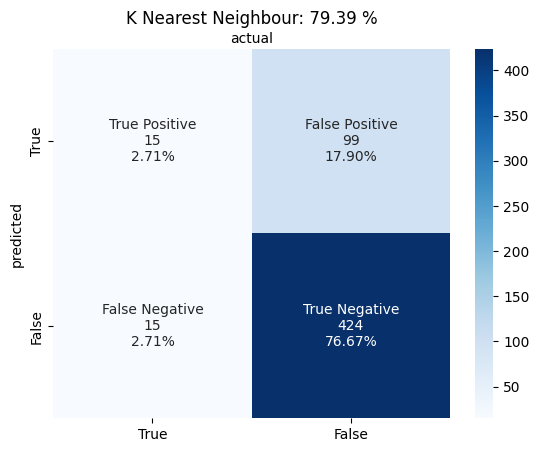

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.793852 |
+-------------+----------+
| Recall      | 0.5      |
+-------------+----------+
| Precision   | 0.131579 |
+-------------+----------+
| Specificity | 0.810707 |
+-------------+----------+
| F1 Score    | 0.208333 |
+-------------+----------+
| ROC-AUC     | 0.655354 |
+-------------+----------+
4) Model Name: Adaptive Boosting


c:\Users\Study\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


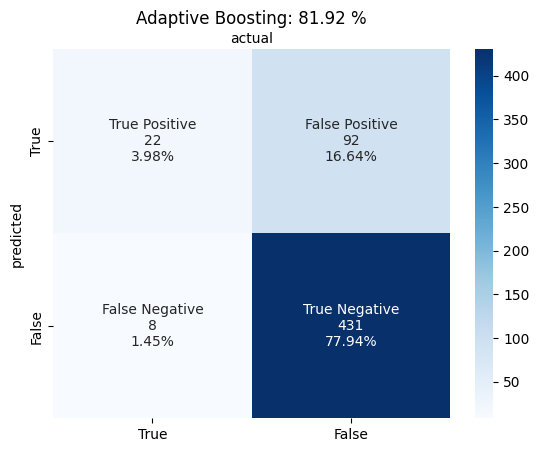

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.819168 |
+-------------+----------+
| Recall      | 0.733333 |
+-------------+----------+
| Precision   | 0.192982 |
+-------------+----------+
| Specificity | 0.824092 |
+-------------+----------+
| F1 Score    | 0.305556 |
+-------------+----------+
| ROC-AUC     | 0.778713 |
+-------------+----------+
5) Model Name: Extreme Gradient Boosting


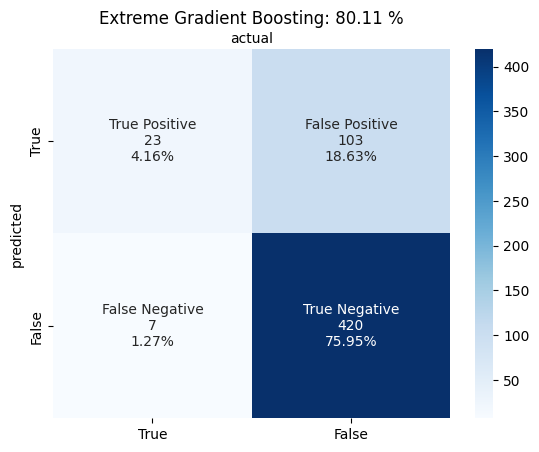

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.801085 |
+-------------+----------+
| Recall      | 0.766667 |
+-------------+----------+
| Precision   | 0.18254  |
+-------------+----------+
| Specificity | 0.803059 |
+-------------+----------+
| F1 Score    | 0.294872 |
+-------------+----------+
| ROC-AUC     | 0.784863 |
+-------------+----------+
6) Model Name: Voting Classifier


c:\Users\Study\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


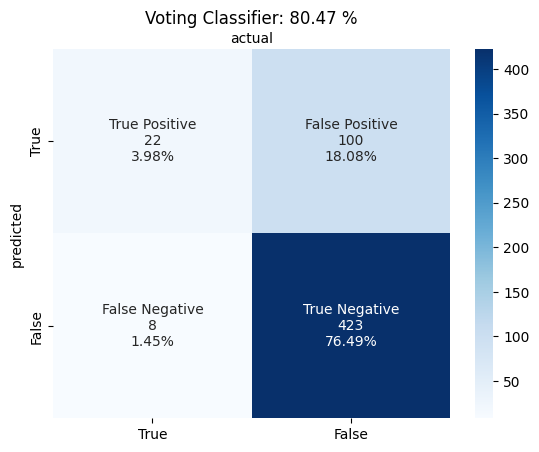

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.804702 |
+-------------+----------+
| Recall      | 0.733333 |
+-------------+----------+
| Precision   | 0.180328 |
+-------------+----------+
| Specificity | 0.808795 |
+-------------+----------+
| F1 Score    | 0.289474 |
+-------------+----------+
| ROC-AUC     | 0.771064 |
+-------------+----------+


In [70]:
SMOTE_metrics = train_and_test_models(models, model_names, X_S, y_S)

The difference of SMOTE and SMOTETomek is the algorithm for generating artifical samples.
SMOTE tomek tries to create spatial boundaries surrounding the minority class and creating new artificial samples within that space

### 5.5. SMOTE+TOMEK


In [71]:
print(Counter(y_train))
smo_tomek = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')) 
X_ST, y_ST = smo_tomek.fit_resample(X_train, y_train)
print(Counter(y_ST))

Counter({0: 1203, 1: 86})
Counter({1: 1203, 0: 1188})


1) Model Name: Decision Tree


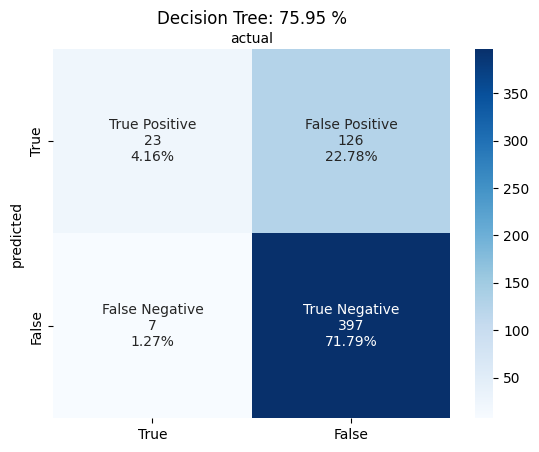

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.759494 |
+-------------+----------+
| Recall      | 0.766667 |
+-------------+----------+
| Precision   | 0.154362 |
+-------------+----------+
| Specificity | 0.759082 |
+-------------+----------+
| F1 Score    | 0.256983 |
+-------------+----------+
| ROC-AUC     | 0.762874 |
+-------------+----------+
2) Model Name: Random Forest


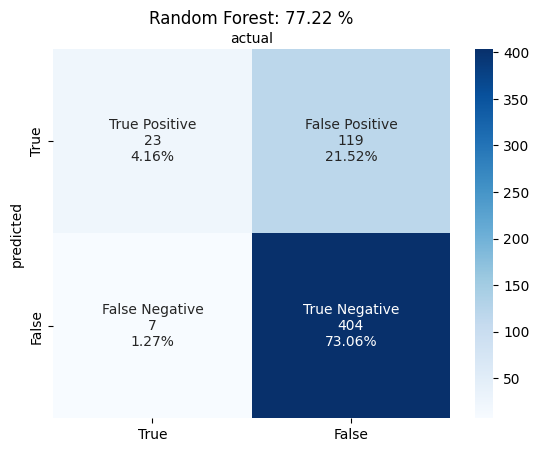

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.772152 |
+-------------+----------+
| Recall      | 0.766667 |
+-------------+----------+
| Precision   | 0.161972 |
+-------------+----------+
| Specificity | 0.772467 |
+-------------+----------+
| F1 Score    | 0.267442 |
+-------------+----------+
| ROC-AUC     | 0.769567 |
+-------------+----------+
3) Model Name: K Nearest Neighbour


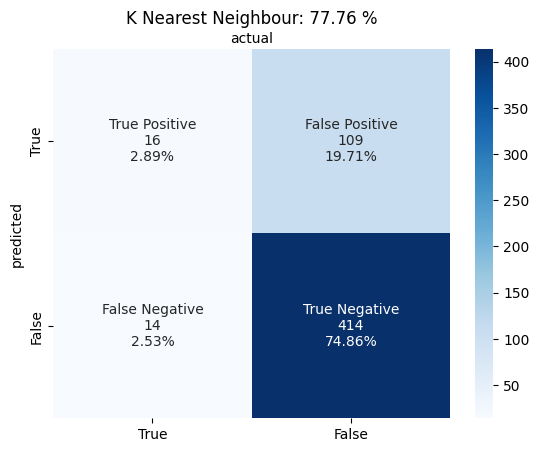

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.777577 |
+-------------+----------+
| Recall      | 0.533333 |
+-------------+----------+
| Precision   | 0.128    |
+-------------+----------+
| Specificity | 0.791587 |
+-------------+----------+
| F1 Score    | 0.206452 |
+-------------+----------+
| ROC-AUC     | 0.66246  |
+-------------+----------+
4) Model Name: Adaptive Boosting


c:\Users\Study\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


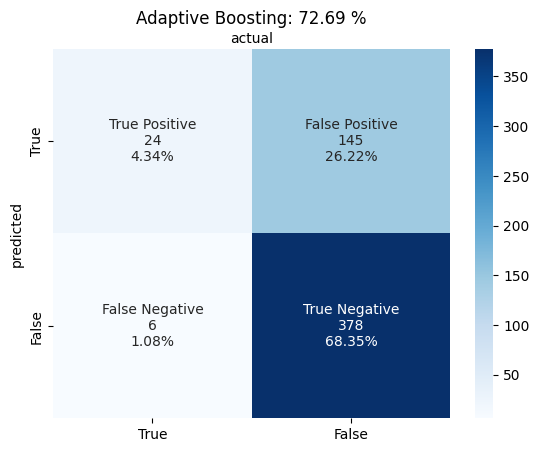

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.726944 |
+-------------+----------+
| Recall      | 0.8      |
+-------------+----------+
| Precision   | 0.142012 |
+-------------+----------+
| Specificity | 0.722753 |
+-------------+----------+
| F1 Score    | 0.241206 |
+-------------+----------+
| ROC-AUC     | 0.761377 |
+-------------+----------+
5) Model Name: Extreme Gradient Boosting


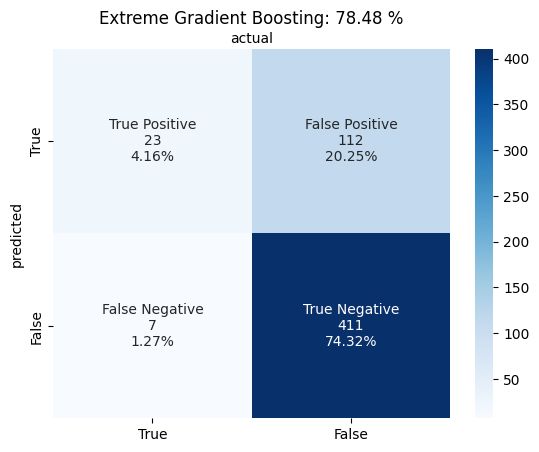

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.78481  |
+-------------+----------+
| Recall      | 0.766667 |
+-------------+----------+
| Precision   | 0.17037  |
+-------------+----------+
| Specificity | 0.785851 |
+-------------+----------+
| F1 Score    | 0.278788 |
+-------------+----------+
| ROC-AUC     | 0.776259 |
+-------------+----------+
6) Model Name: Voting Classifier


c:\Users\Study\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


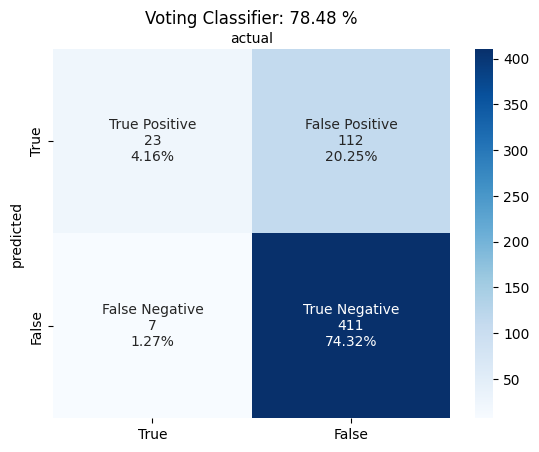

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.78481  |
+-------------+----------+
| Recall      | 0.766667 |
+-------------+----------+
| Precision   | 0.17037  |
+-------------+----------+
| Specificity | 0.785851 |
+-------------+----------+
| F1 Score    | 0.278788 |
+-------------+----------+
| ROC-AUC     | 0.776259 |
+-------------+----------+


In [72]:
smo_tomek_metrics = train_and_test_models(models, model_names, X_ST, y_ST)

### 5.6. K-fold

#### Purpose of k-fold

To check robustness and reliability of the models, we can split the training data in k-folds, cross validating on the predictions averaging out the predictions. Because the models is being run multiple times fitted on different training data and tested on every part of the dataset.  

This can help combat overfitting and show inconsistencies of the model predictions, as opposed to running a model once with great results, and the next run drop of performance by a large amount.

Furthermore it can also be used when tuning the hyper parameters (parameters set for the model, e.g. max depth for a tree classifier) of selected models, especailly in conjuction with methods like GridSearch to automate this process.  

Mapping from models to classifier names these are used in order to adjust hyper parameters when using gridsearch cross validation

In [73]:
CLASSIFIER_MAPPING = {
    models[0]: 'decisiontreeclassifier',
    models[1]: 'randomforestclassifier',
    models[2]: 'baggingclassifier',
    models[3]: 'adaboostclassifier',
    models[4]: 'xgbclassifier',
    models[5]: 'votingclassifier'
}

MODEL_CONSTRUCTORS = {
    models[0]: DecisionTreeClassifier,
    models[1]: RandomForestClassifier,
    models[2]: BaggingClassifier,
    models[3]: AdaBoostClassifier,
    models[4]: XGBClassifier,
    models[5]: VotingClassifier
}

Define mapping of parameters and hyper parameters to be tweaked for each model with gridsearchcv

In [74]:
def frange(start, stop, fraction):
    return [x/fraction for x in range(start,stop)]

dct_params = {
    'max_depth': range(2, 10)
}

rfc_params = {
    'n_estimators': range(5,100,5),
    'max_depth': range(1, 9)
}

bac_params = {
    'n_estimators': [10, 50, 100],
}

ada_params = {
    'n_estimators': [50, 100, 200]
}

bst_params = {
    'n_estimators': range(1,20),
    'max_depth': range(2, 4),
    'learning_rate': frange(0,3, 10),
    'subsample': frange(5, 11, 10),
    'colsample_bytree': frange(5, 11, 10)
}

vcl_params = {
    'estimators': [estimators],  # List of (name, estimator) tuples
    'voting': ['hard', 'soft'],
    'weights': [[1, 1], [2, 1], [1, 2]]  # Weights for soft voting
}

model_params = {    
    models[0]: dct_params,
    models[1]: rfc_params,
    models[2]: bac_params,
    models[3]: ada_params,
    models[4]: bst_params,
    models[5]: vcl_params
}

#### K-fold with he option of tuning hyper parameters and a manual method without tuning options incase of errors 

Hyperpararmeter tuning is done using a pipe gridsearchCV method that searches through a grid trying every combination defined 

In [75]:
from imblearn.pipeline import Pipeline, make_pipeline

def specificity_score(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity


# Defining the score metrics
SCORING_METRICS = {
    'accuracy_score': 'accuracy',
    'recall_score': 'recall',
    'precision_score': 'precision',
    'specificity_score': metrics.make_scorer(specificity_score), 
    'f1_score': 'f1',
    'roc_auc_score': 'roc_auc'
}

def k_fold(model, X_training=X_train, y_Training=y_train, num_folds=5, hyperparameter_tuning=False):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    k_fold_metrics = []
    
    VCL_INDEX = 5 # to remedy error: "VotingClassifier has none of the following attributes: decision_function, predict_proba.""
    try: 
        if VCL_INDEX == models.index(model):
            raise TypeError("VotingClassifier cannot cross_validate using sci-kit")
        oversampler = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')) 
        imba_pipeline = make_pipeline(oversampler, model) 
        if hyperparameter_tuning:
            model_param = model_params[model]
            classifier_name = CLASSIFIER_MAPPING[model]
            new_params = {classifier_name + '__'  + key : model_param[key] for key in model_param}
            grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring=SCORING_METRICS, refit='recall_score', return_train_score=True)
            grid_imba.fit(X_training, y_Training)

            prefix_to_remove = classifier_name + '__'
            best_params = {key[len(prefix_to_remove):]: value for key, value in grid_imba.best_params_.items()}
            imba_pipeline = make_pipeline(oversampler, (MODEL_CONSTRUCTORS.get(model)(**best_params))) # overwrite model using best parameters
        cross_val_results = cross_validate(imba_pipeline, X_training, y_Training, cv=kf, scoring = SCORING_METRICS)
    except Exception as _:
        return k_fold_manual(model, X_training, y_Training, num_folds)
     
    IRRELEVANT_SCORES = ['fit_time', 'score_time']
    for test_score in cross_val_results:
        if IRRELEVANT_SCORES.__contains__(test_score): # Remove unnessary scores 
            continue
    
        k_fold_metrics.append(cross_val_results[test_score].mean())
        
    return k_fold_metrics

def k_fold_manual(model, X_training=X_train, y_Training=y_train, num_folds=5):
    k_fold_metrics = []
    i = models.index(model)
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    oversampler = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')) 

    for _, (train_index, test_index) in enumerate(kf.split(X_training, y_Training)):
        k_X_train, k_X_test = X_training.iloc[train_index], X_training.iloc[test_index]
        k_y_train, k_y_test = y_Training[train_index], y_Training[test_index]

        X_train_fold_upsample, y_train_fold_upsample = oversampler.fit_resample(k_X_train, k_y_train)

        model.fit(X_train_fold_upsample, y_train_fold_upsample)
        model_pred = model.predict(k_X_test)
        i = models.index(model)
        accuracy = metrics.accuracy_score(k_y_test, model_pred)
        order = visualize_cf(model_pred, model_names[i], accuracy, k_y_test)
        metric = calc_metrics(model_pred, order, k_y_test)
        k_fold_metrics.append(metric)

    NUMBER_OF_METRICS = len(SCORING_METRICS)
    flip_arr = np.array((k_fold_metrics)).T.reshape(NUMBER_OF_METRICS, num_folds)
    k_fold_metrics_mean = [metric.mean() for metric in flip_arr]
    return k_fold_metrics_mean



#### Evaluate models using k_fold

c:\Users\Study\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Study\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Study\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Study\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

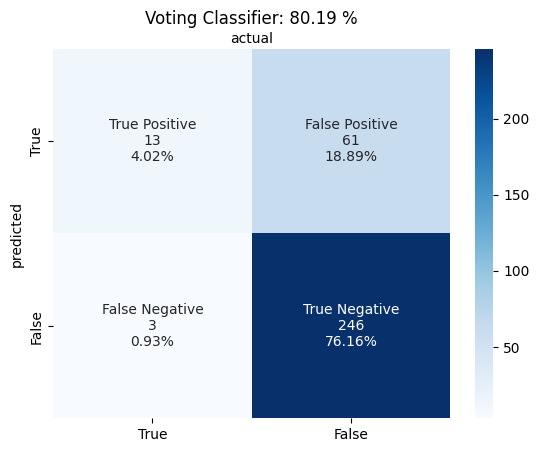

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.801858 |
+-------------+----------+
| Recall      | 0.8125   |
+-------------+----------+
| Precision   | 0.175676 |
+-------------+----------+
| Specificity | 0.801303 |
+-------------+----------+
| F1 Score    | 0.288889 |
+-------------+----------+
| ROC-AUC     | 0.806901 |
+-------------+----------+


c:\Users\Study\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


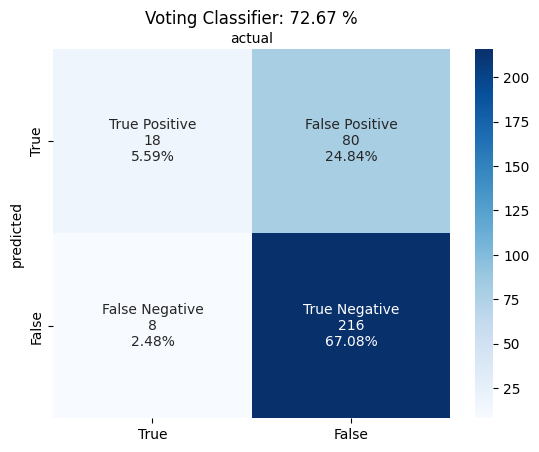

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.726708 |
+-------------+----------+
| Recall      | 0.692308 |
+-------------+----------+
| Precision   | 0.183673 |
+-------------+----------+
| Specificity | 0.72973  |
+-------------+----------+
| F1 Score    | 0.290323 |
+-------------+----------+
| ROC-AUC     | 0.711019 |
+-------------+----------+


c:\Users\Study\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


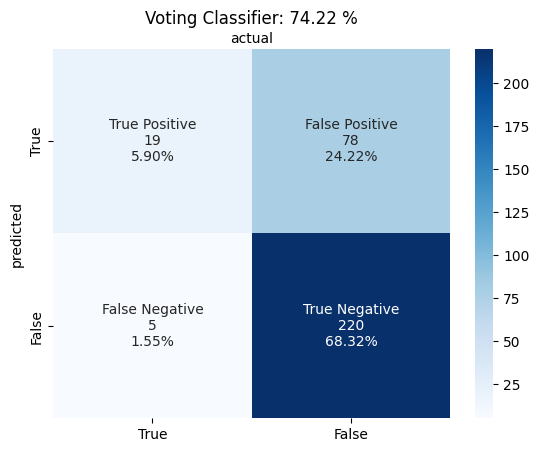

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.742236 |
+-------------+----------+
| Recall      | 0.791667 |
+-------------+----------+
| Precision   | 0.195876 |
+-------------+----------+
| Specificity | 0.738255 |
+-------------+----------+
| F1 Score    | 0.31405  |
+-------------+----------+
| ROC-AUC     | 0.764961 |
+-------------+----------+


c:\Users\Study\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


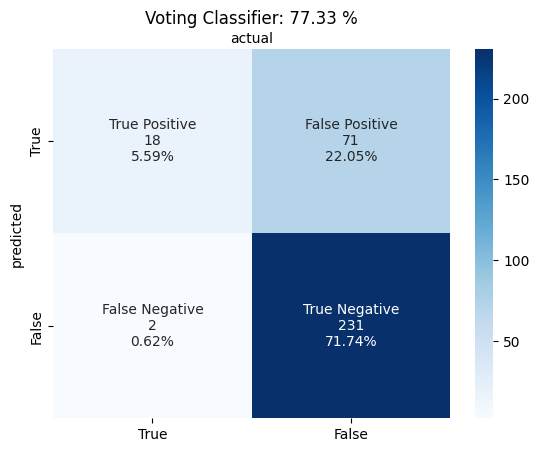

+-------------+----------+
| Metric      |    Value |
+=============+==========+
| Accuracy    | 0.773292 |
+-------------+----------+
| Recall      | 0.9      |
+-------------+----------+
| Precision   | 0.202247 |
+-------------+----------+
| Specificity | 0.764901 |
+-------------+----------+
| F1 Score    | 0.330275 |
+-------------+----------+
| ROC-AUC     | 0.83245  |
+-------------+----------+


In [76]:
k_fold_metrics = []

for i, model in enumerate(models):
    evaluation_metrics = k_fold(model, num_folds=4)
    k_fold_metrics.append(evaluation_metrics)

### 5.7. Comparative analysis of metrics

In order to compare the models perfomance metrics, all the metrics acquired are presented in a stacked bar plot and table per model.

In [77]:
img_folder = "img/"
BAR_PLOT_FOLDER = img_folder + "bar/"
TABLE_PLOT_FOLDER = img_folder + "table/"
NUMBER_OF_METHODS = 4
SAMPLING_METHOD_COLOURS = ['#ff7f7f',  '#7fff7f', '#7f7fff', '#ffff7f'] # soft: red, green , blue ,yellow

def comparative_analysis(model, model_name):

    index = models.index(model)
    model_metrics = []
    model_metrics.append(actual_metrics[index])
    model_metrics.append(SMOTE_metrics[index])
    model_metrics.append(smo_tomek_metrics[index])
    model_metrics.append(k_fold_metrics[index])

    columns = ["Accuracy", "Recall", "Precision", "Specificity", "F1-Score", "ROC-AUC"] 
    rows = ['actual', 'smote', 'smote_tomek', 'k_fold']

    # create stacked bar plot
    create_bar_plot(model_name, model_metrics, rows, columns, SAMPLING_METHOD_COLOURS)

    _, ax = plt.subplots()
    cell_text = []
    DECIMAL_PLACES = 2
    for row in range(NUMBER_OF_METHODS):
        cell_text.append(['{:.{}f}%'.format(x * 100, DECIMAL_PLACES) for x in model_metrics[row]])

    plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=SAMPLING_METHOD_COLOURS,
                      colLabels=columns,
                      # cellColours=[softened_colors] * (len(rows)),
                      loc='center',
                      cellLoc='center',
                      bbox=[0, 0, 1, 1])

    ax.axis('off')
    plt.xticks([])
    plt.title(model_name, fontsize=13)
    plt.tight_layout()
    plt.savefig(TABLE_PLOT_FOLDER + "eval_metrics_" + model_name, bbox_inches='tight')
    plt.show()

def create_bar_plot(model_name, data, rows, columns, colors = ['r','g','b','y']):
    # set width of bar 
    barWidth = 0.2
    plt.subplots(figsize =(12, 8)) 
    
    # Set position of bar on X axis 
    bar_positions = [np.arange(len(data[0]))] # intial bar position
    for i in range(0, len(rows)):
        bar_positions.append([x + barWidth for x in bar_positions[i]])

    # Make the plot
    for i in range(len(rows)):
        plt.bar(bar_positions[i], convert_to_percantage(data[i]), color = colors[i], width = barWidth, edgecolor ='grey', label = rows[i]) 

    # Adding Xticks 
    plt.xlabel('Sampling method and Metric', fontweight ='bold', fontsize = 15) 
    plt.ylabel('Metric in %', fontweight ='bold', fontsize = 15) 
    plt.xticks([r + barWidth for r in range(len(columns))], columns)
    plt.title(model_name, fontsize=20)
    plt.legend()
    plt.savefig(BAR_PLOT_FOLDER + "bar_metrics_" + model_name, bbox_inches='tight')

    plt.show()

def convert_to_percantage(metrics):
    return [metric * 100 for metric in metrics]
  


Display and save plots for comparative analysis

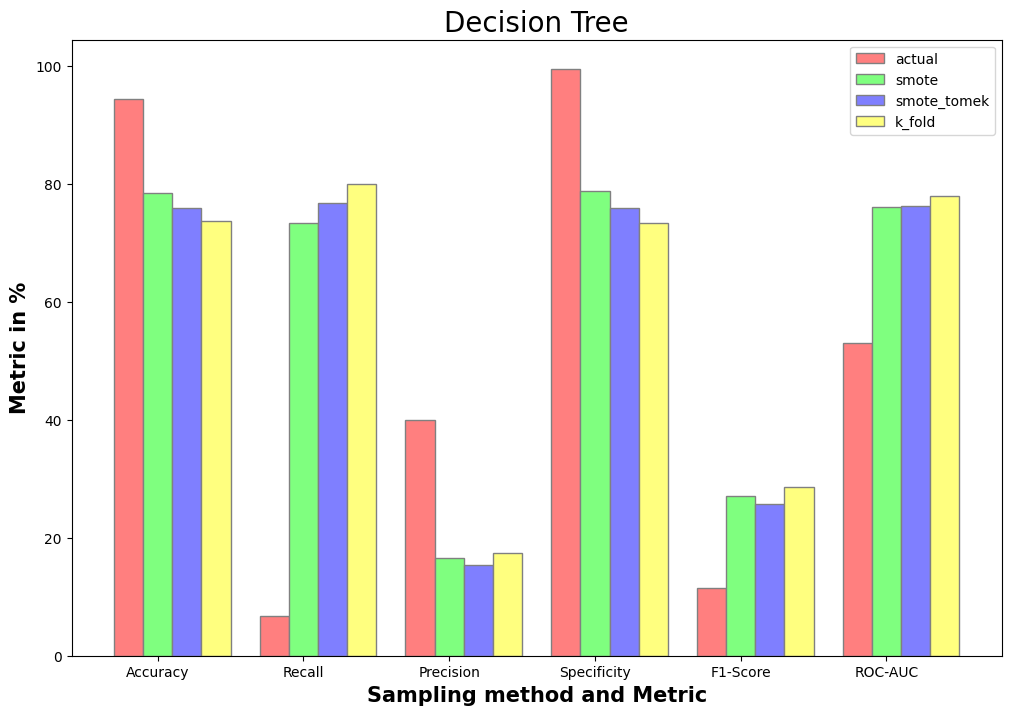

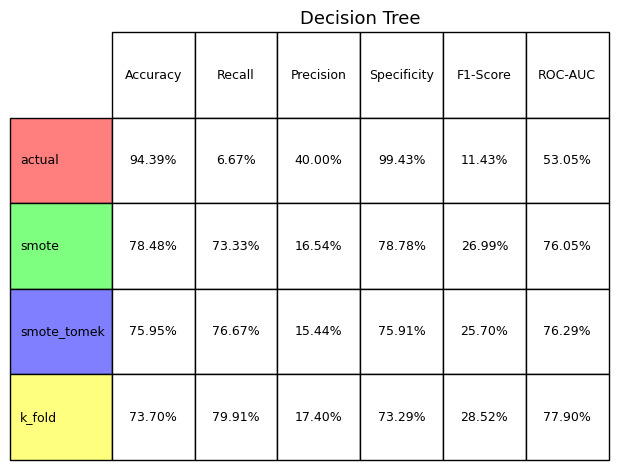

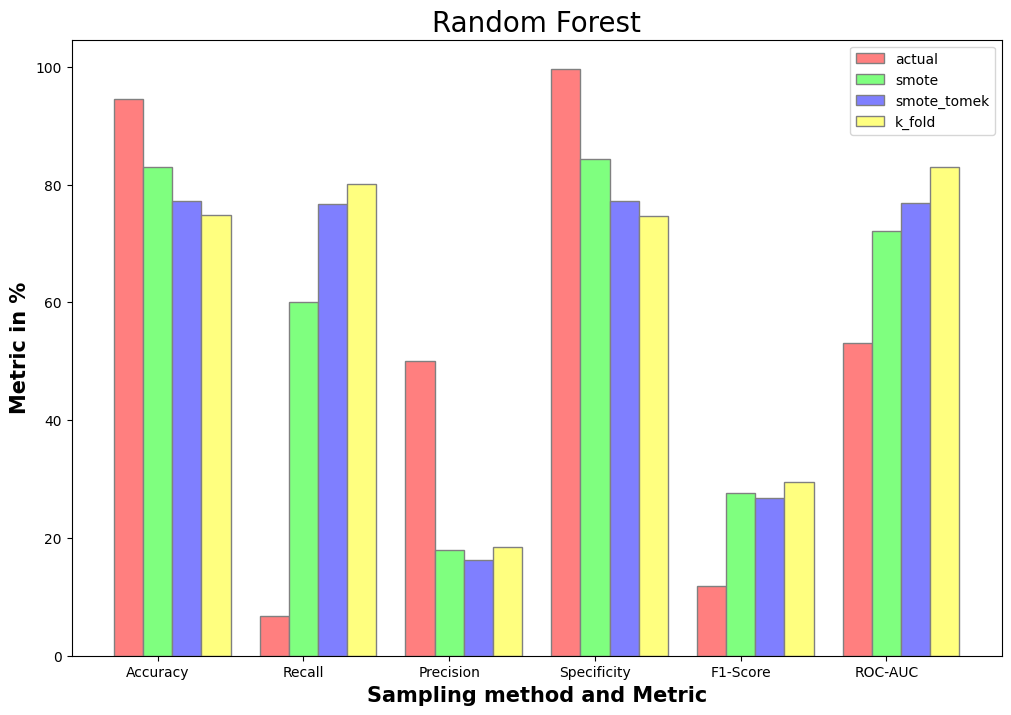

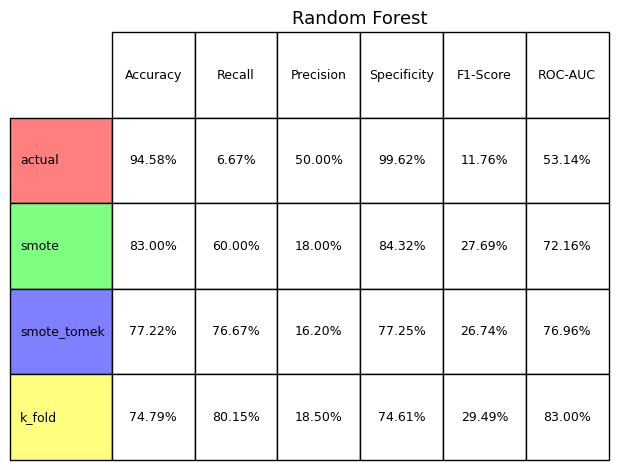

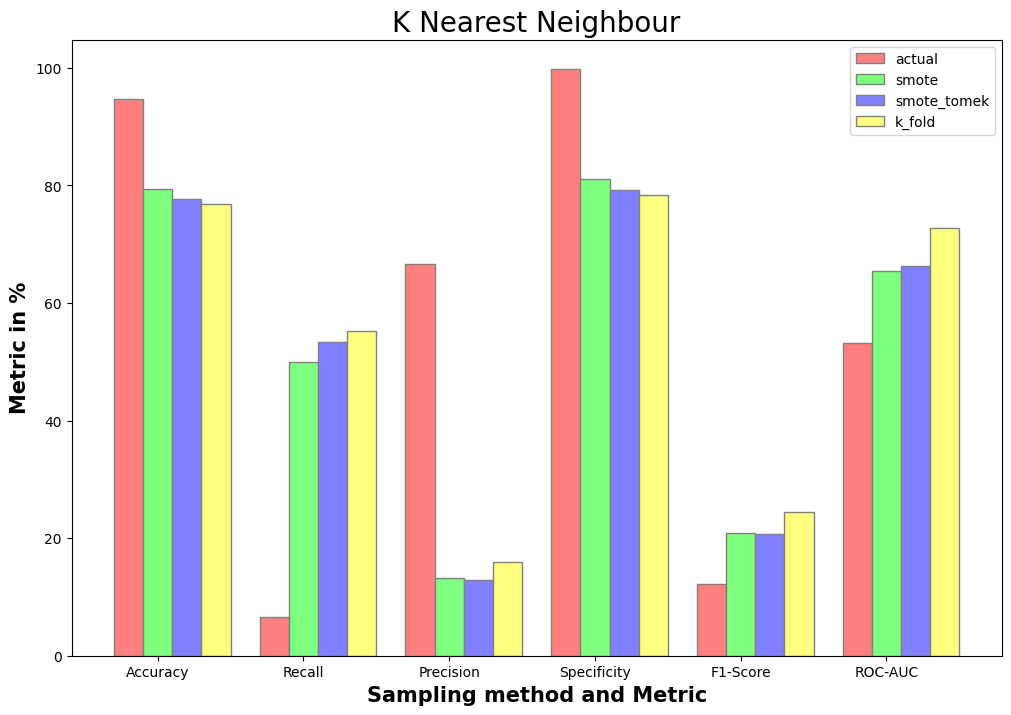

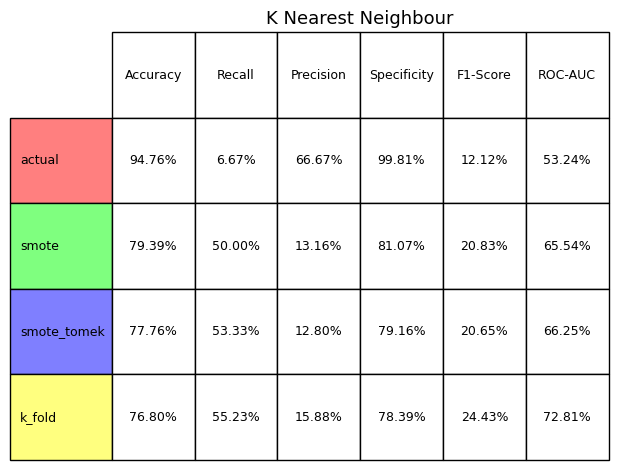

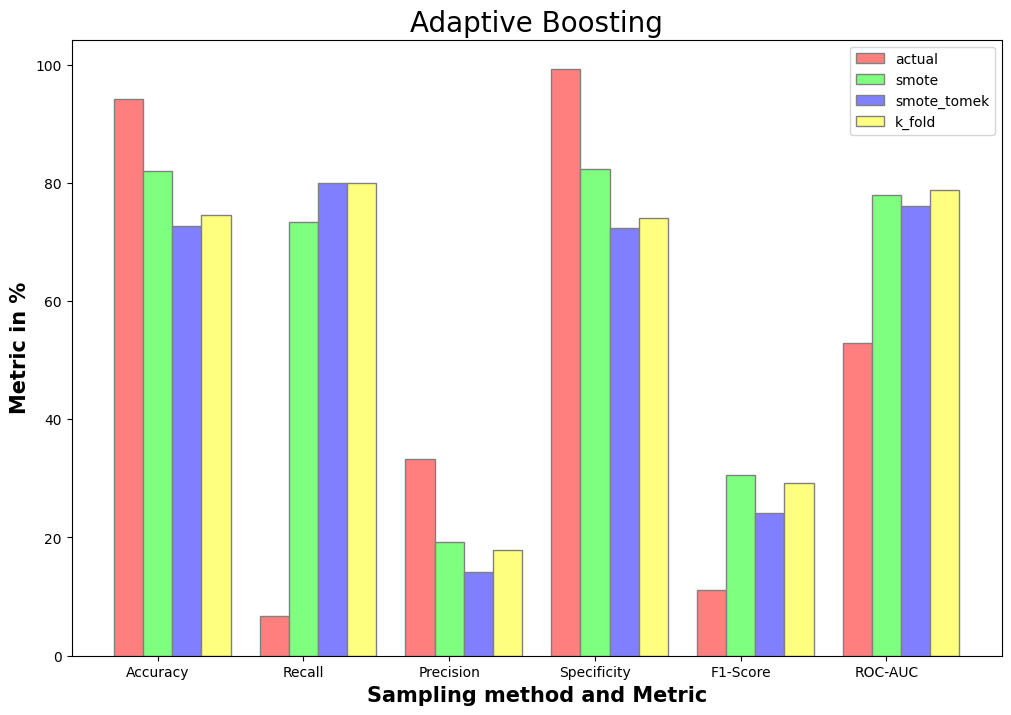

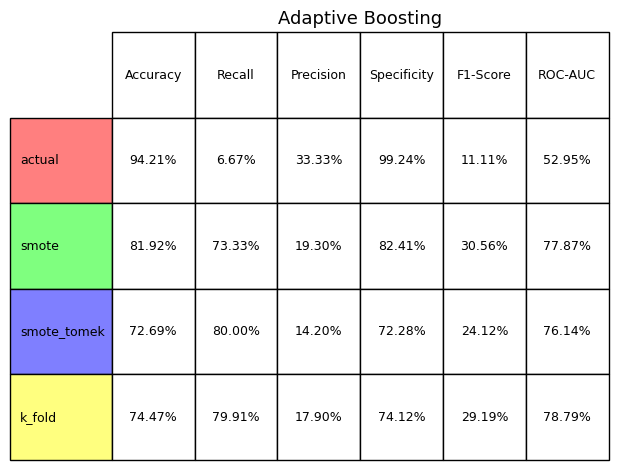

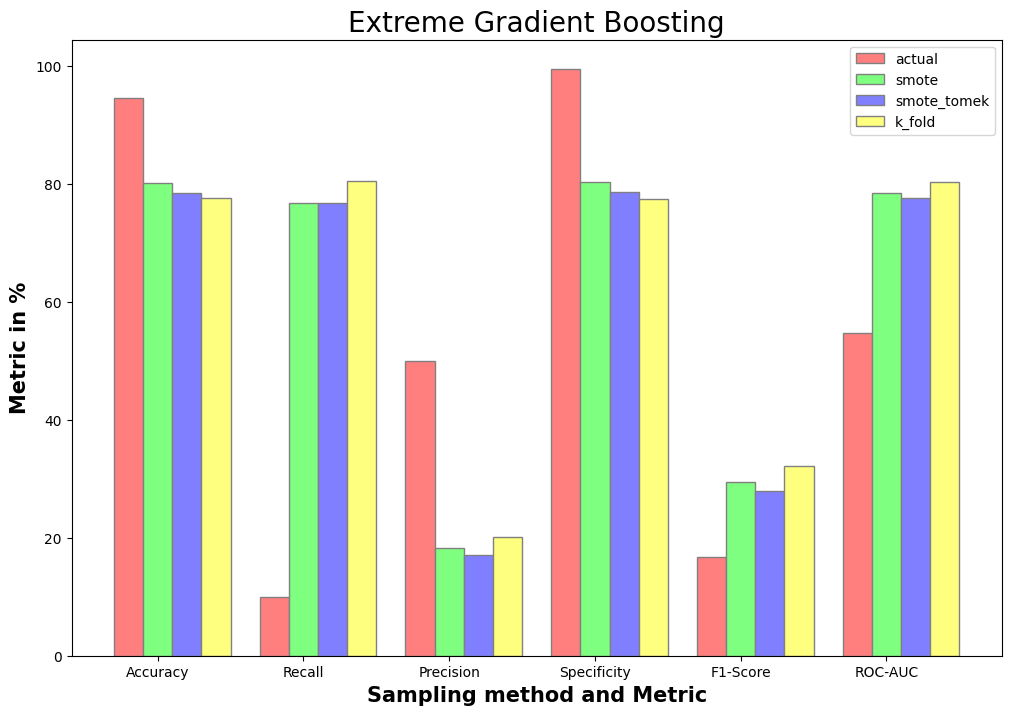

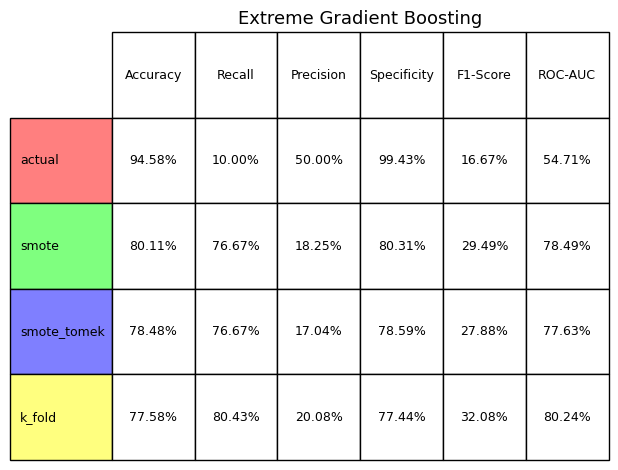

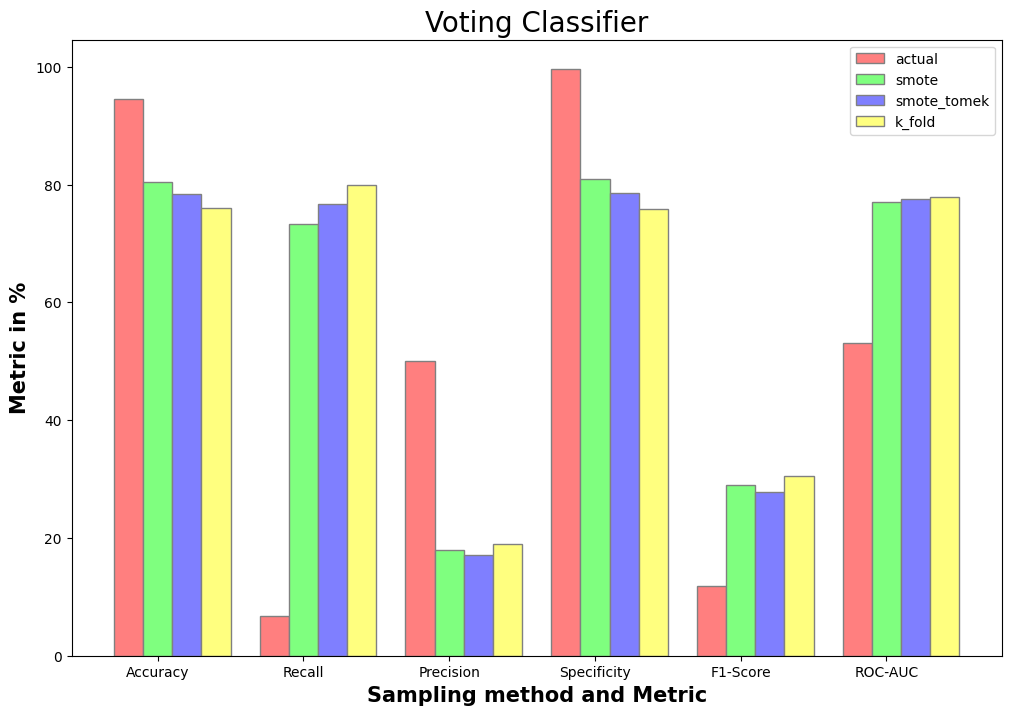

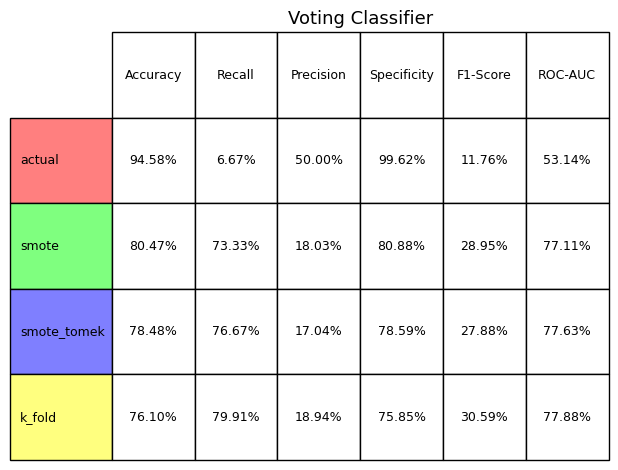

In [78]:
PRINT_FIGS = True
for (model, model_name) in list(zip(models, model_names)):
    if PRINT_FIGS: 
        comparative_analysis(model, model_name)